## Project 3

### Jumpei Fujimoto

** DSCI 11000 - Introduction to Data Science**

** Due Friday, December 7**

The cell below contains the packaged that you will need for this project.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Part A: Create Stock Class

In [2]:
class Stock:
    def __init__(self, price, rate, vol):
        self.price = price
        self.rate = rate
        self.vol = vol
        self.run = [price]
        self.final = price
        self.mc_prices = []
        self.mc_yields = []
        
    def simulate(self, days):
        self.run = []
        newprice = self.price
        for i in range(0, days):
            ret = np.random.normal(self.rate / 365, self.vol /365, 1)[0]
            newprice = newprice * math.exp(ret)
            self.run.append(newprice)
        self.final = self.run[-1]
        self.run = np.array(self.run)
        return self.run
    
    def annual_yield(self):
        return math.log(self.final/ self.price) * (365 / len(self.run))
    def monte_carlo(self, days, n):
        self.mc_prices = []
        self.mc_yields = []
        for i in range(0, n):
            self.simulate(days)
            self.mc_prices.append(self.final)
            self.mc_yields.append(self.annual_yield())
        self.mc_prices = np.array(self.mc_prices)
        self.mc_yields = np.array(self.mc_yields)
        return self.mc_prices

## Part B: Test the Class

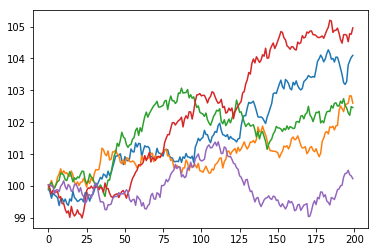

[0.07326419375470376, 0.04683708384212186, 0.04436766046022331, 0.0883051434787871, 0.0042619738360058865]


In [3]:
test_stock = Stock(100, 0.06, 0.5)
annual_yields = []
for i in range(0, 5):
    simu = test_stock.simulate(200)
    plt.plot(simu)
    annual_yields.append(test_stock.annual_yield())
plt.show()
print(annual_yields)

## Part C: Rate and Volatility

Average Annual Yield for A over 1000 runs: 0.1212
Average Annual Yield for A over 1000 runs: 0.1205


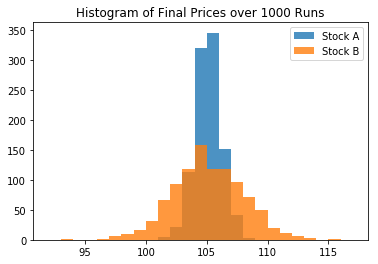

In [4]:
np.random.seed(1)
stockA = Stock(100, 0.12, 0.3)
stockB = Stock(100, 0.12, 0.8)

A_mc = stockA.monte_carlo(150, 1000)
B_mc = stockB.monte_carlo(150, 1000)

A_mean = round(np.mean(stockA.mc_yields), 4)
B_mean = round(np.mean(stockB.mc_yields), 4)

print("Average Annual Yield for A over 1000 runs: " + str(A_mean))
print("Average Annual Yield for A over 1000 runs: " + str(B_mean))
      
plt.hist(A_mc, bins=range(92,118), alpha=0.8, label='Stock A')
plt.hist(B_mc, bins=range(92,118), alpha=0.8, label='Stock B')
plt.title('Histogram of Final Prices over 1000 Runs')
plt.legend()
plt.show()

## Part D: Generating Specific Outcomes

In [5]:
stockA = Stock(78, 0.04, 1.2)
stockB = Stock(75, 0.08, 0.8)
stockC = Stock(72, 0.16, 0.6)

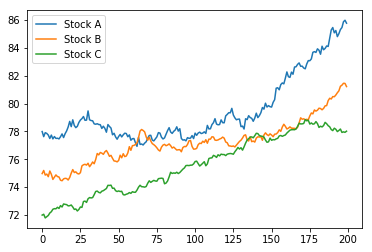

In [6]:
np.random.seed(22)
plt.plot(stockA.simulate(200), label= "Stock A")
plt.plot(stockB.simulate(200), label= "Stock B")
plt.plot(stockC.simulate(200), label= "Stock C")
plt.legend()
plt.show()

**Example in which Stock A has the highest final price.**

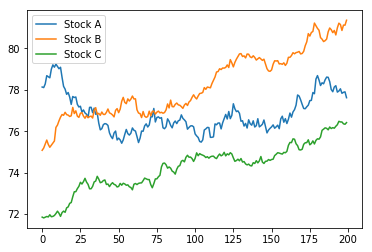

In [7]:
np.random.seed(42)
plt.plot(stockA.simulate(200), label= "Stock A")
plt.plot(stockB.simulate(200), label= "Stock B")
plt.plot(stockC.simulate(200), label= "Stock C")
plt.legend()
plt.show()

**Simulation in which Stock B has the highest final price.**

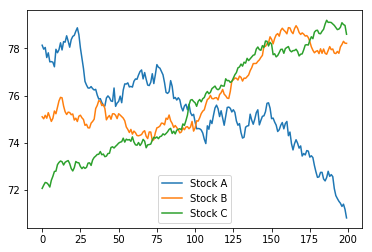

In [8]:
np.random.seed(12)
plt.plot(stockA.simulate(200), label= "Stock A")
plt.plot(stockB.simulate(200), label= "Stock B")
plt.plot(stockC.simulate(200), label= "Stock C")
plt.legend()
plt.show()

**Simulation in which Stock C has the highest final price.**

## Part E: Comparing two Stocks

In [9]:
stockA = Stock(120, 0.07, 0.2)
stockB = Stock(120, 0.05, 1.1)
mcA = stockA.monte_carlo(365, 2000)
mcB = stockB.monte_carlo(365, 2000)

pAbetter = sum(mcA > mcB) / 2000
pAA = sum(mcA >130) / 2000
pBA = sum(mcB > 130) / 2000
pAB = sum(mcA < 120) / 2000
pBB = sum(mcB < 120) / 2000

In [10]:
print("Proportions of Runs in which..." + "\n" + ("_"*31))
print("A Beats B: " + str(pAbetter) + "\n")
print("A ends above 130: " + str(pAA))
print("B ends above 130: " + str(pBA) + "\n")
print("A ends below 120: " + str(pAB))
print("B ends below 120: " + str(pBB))

Proportions of Runs in which...
_______________________________
A Beats B: 0.641

A ends above 130: 0.159
B ends above 130: 0.2855

A ends below 120: 0.0
B ends below 120: 0.2105
